# ML - Supervised - Classification

In [704]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split as TTS
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

## Labelised Data

In [705]:
#Chargement
#df = pd.read_csv("data/filename.csv")
df = sns.load_dataset('iris')

### Training

In [706]:
#Isolation
#target_feature_name = 'target_feature'
target_feature_name = 'species'
Y = df[target_feature_name]
X = df.drop(columns=target_feature_name)

In [707]:
#Classes
classes = Y.astype('category').cat.categories.tolist()

In [708]:
#TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, stratify=Y, random_state=314)

In [709]:
#Pipeline
pipeline_details = [('PCA', PCA(random_state=42)),
                    ('KNN', KNN())]
pipeline = Pipeline(steps=pipeline_details)

In [710]:
#GridSearchCV

hyperparameters = {}
hyperparameters['PCA__n_components'] = [i for i in range(1, X_tr.shape[1]+1)]
hyperparameters['KNN__n_neighbors']  = [i for i in range(1, 21 +1, 2)]

hyperparameter_search = GridSearchCV(pipeline,
                                     hyperparameters,
                                     scoring='accuracy', 
                                     cv=5)

hyperparameter_search.fit(X_tr, Y_tr)

print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

Meilleur score : 0.99091
Meilleur paramètres : {'KNN__n_neighbors': 15, 'PCA__n_components': 4}


In [711]:
#PCA
N=hyperparameter_search.best_params_['PCA__n_components']
pca = PCA(n_components=N, random_state=42)
pca.fit(X_tr);

In [712]:
#Transform
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

In [713]:
#KNN
N=hyperparameter_search.best_params_['KNN__n_neighbors']
knn = KNN(n_neighbors=N)
knn.fit(X_tr_PCA, Y_tr);

In [714]:
#Accuracy du training
train_preds = knn.predict(X_tr_PCA)
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

Accuracy : 0.9821428571428571


## Unlabelised Data

In [715]:
#Chargement
#df = pd.read_csv("data/filename.csv")
df = pd.DataFrame(X_te_PCA)

### Prediction

In [716]:
#KNN
preds = knn.predict(df)
proba = knn.predict_proba(df)

## Result

In [718]:
df
df['Predictions'] = preds

for i in range(0, len(proba[0])):
    df[classes[i]] = proba[:, i]

#for k in range(0, len(proba)):
#    print('iris[', k, ']')
#    for i in range(0, len(proba[0])):
#        print('{} {}= {}'.format(classes[i], (10-len(classes[i]))*' ', proba[k][i]))

df

0         1         2         3 Predictions  setosa  versicolor  \
0  -0.716099 -1.028052 -0.003656 -0.010460  versicolor     0.0    1.000000   
1   0.450034 -0.661315  0.037451  0.296051  versicolor     0.0    1.000000   
2   1.363608 -0.404683  0.045669  0.198818   virginica     0.0    0.266667   
3  -2.567370  0.552244 -0.066586  0.028245      setosa     1.0    0.000000   
4  -2.886608  0.021055 -0.160340 -0.164462      setosa     1.0    0.000000   
5   1.257516  0.644915 -0.489204 -0.027015  versicolor     0.0    0.666667   
6  -3.013032 -0.344942  0.239463  0.080936      setosa     1.0    0.000000   
7   0.514276 -1.126970  0.656221  0.134302  versicolor     0.0    0.800000   
8  -2.655977 -0.160104 -0.119918 -0.014939      setosa     1.0    0.000000   
9   0.645019 -0.310415  0.353463  0.201254  versicolor     0.0    0.933333   
10  3.198527  1.383259 -0.279405  0.224596   virginica     0.0    0.000000   
11 -2.692350 -0.156102 -0.174169  0.060678      setosa     1.0    0.000000   
12  2.332318  0.003239  0.266966  0.008480   virginica     0.0    0.000000   
13 -2.374838 -0.036973  0.138862  0.299437      setosa     1.0    0.000000   
14 -2.424620  0.186794  0.250345 -0.185353      setosa     1.0    0.000000   
15  2.085664  0.378548 -0.032210 -0.212424   virginica     0.0    0.066667   
16  2.400010  0.361706  0.447182 -0.245374   virginica     0.0    0.000000   
17 -2.647033  0.137454 -0.028152  0.039453      setosa     1.0    0.000000   
18 -0.083097 -0.730816 -0.176599  0.021965  versicolor     0.0    1.000000   
19 -2.648333  0.790748  0.062987 -0.194852      setosa     1.0    0.000000   
20 -3.234717  0.133774  0.290808 -0.014196      setosa     1.0    0.000000   
21  1.279465 -0.355529 -0.326867  0.020714  versicolor     0.0    0.600000   
22 -2.856586 -0.242008  0.118467  0.063931      setosa     1.0    0.000000   
23 -2.674175  1.127163 -0.262830 -0.194352      setosa     1.0    0.000000   
24  1.929645  0.062143  0.022351  0.165159   virginica     0.0    0.066667   
25  0.910279  0.317811 -0.062760 -0.003021  versicolor     0.0    0.866667   
26  1.424508 -0.145185 -0.151594  0.205098   virginica     0.0    0.333333   
27  1.273842 -0.086533  0.227530  0.004785   virginica     0.0    0.333333   
28  0.217377 -0.354919 -0.241673  0.232160  versicolor     0.0    1.000000   
29  1.307745  0.194795 -0.558955 -0.029075  versicolor     0.0    0.733333   
30  2.106740 -0.182072  0.154831 -0.038423   virginica     0.0    0.000000   
31  2.907143  0.337040 -0.477109  0.262458   virginica     0.0    0.000000   
32 -0.760262 -1.007021  0.113733  0.051405  versicolor     0.0    1.000000   
33  3.050179  0.659740 -0.432372 -0.314954   virginica     0.0    0.000000   
34  1.334902 -0.741536  0.344192 -0.111971   virginica     0.0    0.266667   
35  0.621775 -0.001762 -0.216335  0.029429  versicolor     0.0    1.000000   
36 -2.731887 -0.288071 -0.062059 -0.135415      setosa     1.0    0.000000   
37  1.438790  0.474052 -0.403734 -0.001704  versicolor     0.0    0.533333   

    virginica  
0    0.000000  
1    0.000000  
2    0.733333  
3    0.000000  
4    0.000000  
5    0.333333  
6    0.000000  
7    0.200000  
8    0.000000  
9    0.066667  
10   1.000000  
11   0.000000  
12   1.000000  
13   0.000000  
14   0.000000  
15   0.933333  
16   1.000000  
17   0.000000  
18   0.000000  
19   0.000000  
20   0.000000  
21   0.400000  
22   0.000000  
23   0.000000  
24   0.933333  
25   0.133333  
26   0.666667  
27   0.666667  
28   0.000000  
29   0.266667  
30   1.000000  
31   1.000000  
32   0.000000  
33   1.000000  
34   0.733333  
35   0.000000  
36   0.000000  
37   0.466667

## Matrice de confusion

In [726]:
from sklearn.metrics import confusion_matrix
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

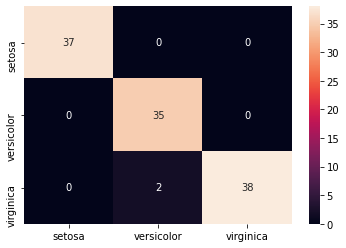

Accuracy : 0.9821428571428571


In [724]:
cm_train = confusion_matrix(train_preds, Y_tr, labels=classes)
show_cm(cm_train, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(train_preds, Y_tr)))

In [ ]:
for i in range

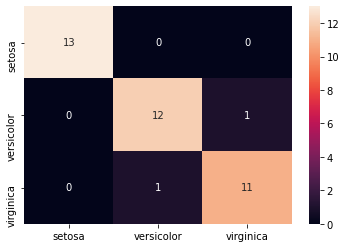

Accuracy : 0.9473684210526315


In [725]:
cm_test = confusion_matrix(preds, Y_te, labels=classes)
show_cm(cm_test, classes)
#Accuracy du training
accuracy = lambda p, y : (p==y).sum()/len(y)
print('Accuracy : {}'.format(accuracy(preds, Y_te)))